In [1]:
import pandas as pd 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from joblib import dump
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
X_train = pd.read_csv("../../../Split Data/Training Dataset/X_train #1.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("../../../Split Data/Training Dataset/y_train #1.csv", index_col=0)
X_val = pd.read_csv("../../../Split Data/Validation Dataset/X_val #1.csv").drop(columns=["Unnamed: 0"])
y_val = pd.read_csv("../../../Split Data/Validation Dataset/y_val #1.csv", index_col=0)
X_test = pd.read_csv("../../../Split Data/Testing Dataset/X_test #1.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("../../../Split Data/Testing Dataset/y_test #1.csv", index_col=0)

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_val_scaled = scaler.transform(X_val)   
X_test_scaled = scaler.transform(X_test) 

In [4]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32),
                    max_iter=1000, random_state=10, verbose = 1)


In [5]:
mlp.fit(X_train_scaled, y_train)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.34405809
Iteration 2, loss = 0.32812675
Iteration 3, loss = 0.32607389
Iteration 4, loss = 0.32514986
Iteration 5, loss = 0.32381725
Iteration 6, loss = 0.32327063
Iteration 7, loss = 0.32263780
Iteration 8, loss = 0.32200419
Iteration 9, loss = 0.32149696
Iteration 10, loss = 0.32120921
Iteration 11, loss = 0.32091127
Iteration 12, loss = 0.32034906
Iteration 13, loss = 0.32020386
Iteration 14, loss = 0.31972317
Iteration 15, loss = 0.31941906
Iteration 16, loss = 0.31927904
Iteration 17, loss = 0.31888545
Iteration 18, loss = 0.31864846
Iteration 19, loss = 0.31869806
Iteration 20, loss = 0.31838758
Iteration 21, loss = 0.31823290
Iteration 22, loss = 0.31793045
Iteration 23, loss = 0.31788257
Iteration 24, loss = 0.31761561
Iteration 25, loss = 0.31748595
Iteration 26, loss = 0.31742050
Iteration 27, loss = 0.31729216
Iteration 28, loss = 0.31734960
Iteration 29, loss = 0.31713092
Iteration 30, loss = 0.31704098
Iteration 31, loss = 0.31710457
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=10,
              verbose=1)

In [6]:
y_val_pred = mlp.predict(X_val_scaled)

In [7]:
Accuracy = metrics.accuracy_score(y_val, y_val_pred)
Precision = metrics.precision_score(y_val, y_val_pred)
Recall = metrics.recall_score(y_val, y_val_pred)
F1_score = metrics.f1_score(y_val, y_val_pred)


In [8]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.8698279181352367, 'Precision': 0.8719835515636836, 'Recall': 0.5143951484200446, 'F1_score': 0.6470729944591664}


In [9]:
y_pred = mlp.predict(X_test_scaled)

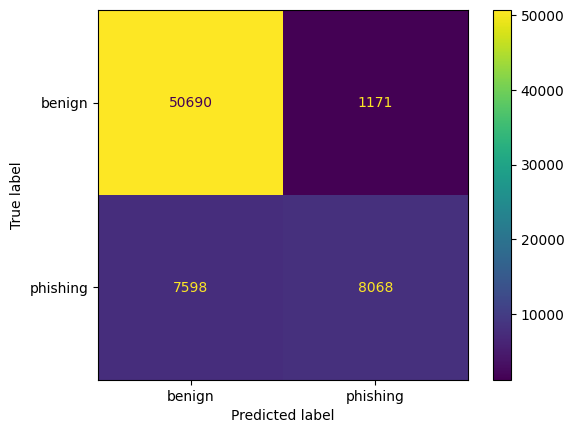

In [10]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["benign", "phishing"])                            
matrix.plot()

In [11]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
F1_score = metrics.f1_score(y_test, y_pred)

In [12]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.8701408325558665, 'Precision': 0.8732546812425587, 'Recall': 0.5150006383250351, 'F1_score': 0.64790202770528}


In [13]:
df = pd.read_csv("../Metrics of Dataset #1.csv")

In [14]:
metrics = pd.DataFrame({"Model": "MLP", "Accuracy": [Accuracy], "Precision":[Precision], "Recall": [Recall], "F1_score": [F1_score]})

In [15]:
df = pd.concat([df, metrics], ignore_index=True)

In [16]:
df.head()

,Model,Accuracy,Precision,Recall,F1_score
0,LinearSVC,0.796126,0.834921,0.151092,0.255878
1,Random Forest,0.870822,0.871482,0.519852,0.651233
2,XGBoost,0.865624,0.873951,0.491702,0.629330
3,MLP,0.870141,0.873255,0.515001,0.647902


In [17]:
df.to_csv("../Metrics of Dataset #1.csv", index=False)

In [18]:
dump(mlp, 'MLP #1.joblib')

['MLP #1.joblib']